# Week One Part One: Logistic Regression

In this notebook, we will go through the technical details behind Logistic Regression model, which is a binary classification model. The dataset used is [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris). The iris dataset contains 4 attributes for 3 types of iris flowers. The purpose is to classify which flowers you have just based on the attributes. To simplify things, we will only consider 2 attributes and 2 classes:

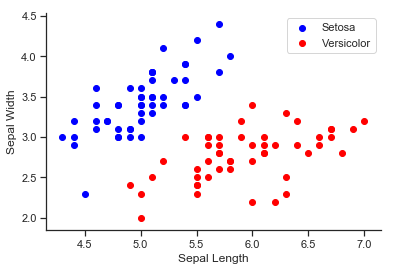

In [8]:
from __future__ import division
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')
import pandas as pd
import numpy as np
import math

data = datasets.load_iris()
X = data.data[:100, :2]  # only get the first 2 flowers and 2 features
y = data.target[:100]
X_full = data.data[:100, :]

setosa = plt.scatter(X[:50,0], X[:50,1], c='b')
versicolor = plt.scatter(X[50:,0], X[50:,1], c='r')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend((setosa, versicolor), ("Setosa", "Versicolor"))
sns.despine() # remove the above axis

As shown in the above figure, these two class are well-separated. Thus, one line is going to classify these data  $$z = \beta_{0} + \beta_{1}x_{sw} + \beta_{2}x_{sl} = \beta \cdot x $$ where $\beta=[\beta_{0},\beta_{1},\beta_{2}]$ and $x=[1,x_{sw},x_{sl}]$.

However, $z$ could be infinitely positive or negative given the Sepal Width (SW) and Sepal Length (SL) $x_{sw}$ and $x_{sl}$. To transform the output into a probabilistic score, we can use sigmoid function.
#### Sigmoid Function

The sigmoid is given: $$h = \frac{1}{1 + e^{-z}}$$ The output will be limited in the range $[0, 1]$.

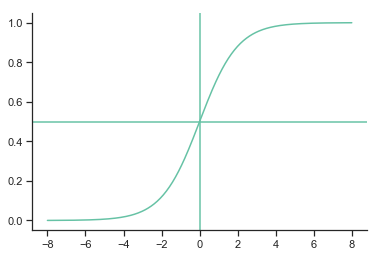

In [9]:
## Display generic plot of sigmoid function ##
x_values = np.linspace(-8, 8, 400)
y_values = [1 / (1 + math.e**(-x)) for x in x_values]
plt.plot(x_values, y_values)
# Add a horizontal line at y = 0.5
plt.axhline(.5)
# Add a vertical line at x = 0
plt.axvline(0)
sns.despine()

As shown in the above figure, the $y$ is scaled into the range from 0 to 1. And intuitively the positive $z$ will make the output larger than 0.5 and the negative $z$ will make the output smaller than 0.5. 

## Machine learning model

Machine Learning = Representation + Target/Loss + Optimization

Now, the data contains two attributes sepal width and sepal length $x_{sw}$ and $x_{sl}$. The model used is the logistic regression model. We assume that Setosa correspond to $y=1$ and Versicolor correspond to $y=0$.


### Loss

Recall: $ \prod $ is product of all the terms e.g. $$ \prod_{i=1}^{3} = (1)(2)(3) $$ while $ \sum $ is the sum of all terms e.g. $$ \sum_{i=1}^{3} = 1 + 2 + 3 $$

The intuitive idea is given N samples, we are going to maximize the probability that our data is classified correctly $$ \prod_{y_i=1}h_{\beta}\prod_{y_i=0}(1-h_{\beta}) $$
Here, $h_{\beta}$ is the probability that the data is setosa ($y=1$) and $1-h_{\beta}$ is the probability that the data belong to versicolor ($y=0$). 

We can apply log over the input and put a negative sign, then we can get the cost function
$$ - log(\prod_{y_i=1}h_{\beta}\prod_{y_i=0}(1-h_{\beta})) = \\
   -(\sum_{y_i=1}log(h_{\beta})+\sum_{y_i=0}(log(1-h_{\beta})) = \\
    -\sum_{i=1}^{N}(y_{i}log(h_{\beta}(x_{i})) + (1-y_{i})log(1-h_{\beta}(x_{i})))$$


Why log function: 

* After log, sum operation is more intuitive
* Log function as smooth montonic functions make optimization easy
* The cost function penalized confident and wrong predictions more than it rewards confident and right prediction


This loss function is actually the cross-entropy error. 


In [10]:
def logistic_func(beta, x):
    """the implmentation of logistic function
    - beta is the model parameters
    - x is the feature matrix （num sample times the number of features)
    """
    # the inclusion of float is to return the answer in float, else it will return as integer
    return float(1) / (1 + math.e**(-x.dot(beta))) 
def cost_func(beta, x, y):
    """the implmentation of cost function
    - beta is the model parameters
    - x is the feature matrix （num sample times the number of features)
    - y is the label vector (num sample)
    """
    log_func_v = logistic_func(beta,x)
    # Remove single dimensional entries from the shape of an array
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1-y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return np.mean(final)

In [13]:
# Find z scores #
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
print(X.shape)

(100, 2)


In [17]:
np.zeros(2)

array([0., 0.])

In [18]:
# hstack stacks arrays in sequence horizontally (column wise) #
# e.g. np.hstack((np.array([1,2,3]),np.array([2,3,4]))) = np.array([1,2,3,2,3,4])
# e.g. np.hstack((np.array([[1],[2],[3]]),np.array([[2],[3],[4]]))) = np.array([[1,2],[2,3],[3,4]])

# We create an array of ones because the first term in the linear regression is the constant term
X_new = np.hstack((np.ones((X.shape[0], 1)), X))

In [19]:
shape = X_new.shape[1]
y_flip = np.logical_not(y) #flip Setosa to be 1 and Versicolor to zero to be consistent
betas = np.zeros(shape)
print('under betas: {} {} {}'.format(betas[0], betas[1], betas[2]))
print('the loss is {}'.format(cost_func(betas, X_new, y_flip)))
## Choose different Beta parameters (Refer to optimization writeup below ##
betas = np.array([0, -1,  1.4])
print('under betas: {} {} {}'.format(betas[0], betas[1], betas[2]))
print('the loss is {}'.format(cost_func(betas, X_new, y_flip)))

under betas: 0.0 0.0 0.0
the loss is 0.6931471805599453
under betas: 0.0 -1.0 1.4
the loss is 0.21224814447698975


### Optimization
The goal of optimization is to find best parameters $\beta$ that minimize the loss function.

**Gradient descent function** is the optimization method that update the model parameters in the direction of descent function of loss function. 
So now that we have our gradients, we can use the gradient descent algorithm to find the values for our $\beta$s that minimize our cost function. The gradient descent algorithm is very simple:
* Initially guess any values for your $\beta$ values
* Repeat until converge:
    * $\beta_{i} = \beta_{i} - (\alpha *$ gradient with respect to $\beta_{i})$ for $i = 0, 1, 2$ in our case

Here $\alpha$ is our learning rate. Basically how large of steps to take on our cost curve. What we are doing is taking our current $\beta$ value and then subtracting some fraction of the gradient. We subtract because the gradient is the direction of greatest increase, but we want the direction of greatest decrease, so we subtract. In other words, we pick a random point on our cost curve, check to see which direction we need to go to get closer to the minimum by using the negative of the gradient, and then update our $\beta$ values to move closer to the minimum. Repeat until converge means keep updating our $\beta$ values until our cost value converges - or stops decreasing - meaning we have reached the minimum. Also, it is important to update all the $\beta$ values at the same time. Meaning that you use the same previous $\beta$ values to update all the next $\beta$ values.


The key issue is finding the gradient.

* slope: the rate of change of the function

$$ \frac{df(x)}{dx} = lim_{h \to 0}\frac{f(x+h) - f(x)}{h}  $$
* gradient: the generalization of slope for functions that take a vector of numbers. It will be a vector of slopes (partial derivates) for each dimension in the input space

Here, we are going to explore two ways to compute gradient. 

1. *numerical gradient*: slow, approximate but easy
2. *analytic gradient*: fast, exact but hard to find

##### numerical gradient

In [7]:
def eval_numerical_gradient(f, x):
    """ 
    a naive implementation of numerical gradient of f at x 
    - f should be a function that takes a single argument
    - x is the point (numpy array) to evaluate the gradient at
    """ 

    fx = f(x) # evaluate function value at original point
    grad = np.zeros(x.shape)
    h = 0.0001

    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

    # evaluate function at x+h
        ix = it.multi_index
        old_value = x[ix]
        x[ix] = old_value + h # increment by h
        fxh = f(x) # evalute f(x + h)
        x[ix] = old_value # restore to previous value (very important!)

        # compute the partial derivative
        grad[ix] = (fxh - fx) / h # the slope
        it.iternext() # step to next dimension
    return grad

In [8]:
loss_flower = lambda beta: cost_func(beta, X_new, y_flip)

In [9]:
df = eval_numerical_gradient(loss_flower, betas)
print(df)

[ 0.00192251  0.12688958 -0.06647031]


##### analytic gradient

Here, we are going to do some math. The cost function as:

$$-\sum_{i=1}^{100}y_{i}log(h(x_{i})) + (1-y_{i})log(1-h(x_{i}))$$

We need to get the derivative for the model parameters $\beta$ for the above function. Here, we will adopt the chain rule：a formula for computing the derivative of the composition of two or more functions.

$$ \frac{dz}{dx} = \frac{dz}{dy}\frac{dy}{dx} $$
where $ z=f(y)$ and $y=f(x)$. Then, we use chain rule. For simplicity, we ingore the negative symbol firstly and focus on one data sample, i.e., $$ L= y_{i}log(h(x_{i})) + (1-y_{i})log(1-h(x_{i}) $$ 

1. first, using the derivate of log(x) is $\frac{1}{x}$: we can get:
$$ \frac{df}{dh} = = \frac{y_{i}}{h(x_{i})} - \frac{1-y_{i}}{1-h(x_{i})} $$
2. then, we would like to get $\frac{dh}{dz}$ and remember $h = \frac{1}{1 + e^{-z}}$. We can use the quotient rule:
$$ \left[\frac{f(x)}{g(x)}\right]'=\frac{g(x)f'(x)-f(x)g'(x)}{[g(x)]^2} $$
Refer to the above rule:
$$ \frac{dh}{dz}= \frac{e^{-z}}{(1+e^{-z})^{2}} = \frac{1}{1+e^{-z}}(1 - \frac{1}{1+e^{-z}}) = h(x_{i})(1-h(x_{i}))$$ 

3. at last, we only neet to get $\frac{dz}{d{\beta}}$ and remember $z = \beta \cdot x$. It is easy:
$$ \frac{dz}{d{\beta}} = x_i $$
4. Finally, we can get:
$$ \frac{df}{d{\beta}} = \frac{df}{dh}\frac{dh}{d{z}}\frac{dz}{d{\beta}} $$
$$\frac{df}{dh}\frac{dh}{d{z}} = y_{i}(1-h(x_{i})) - (1 - y_{i})h(x_{i}) = y_{i}-y_{i}h(x_{i}) - h(x_{i})+y_{i}h(x_{i}) = y_{i} - h(x_{i})$$
$$ \frac{df}{d{\beta}} = (y_{i} - h(x_{i}))x_i $$

**Do not forget the negative and summation operation**, we can get the final gradient:

$$ \frac{df}{d{\beta}} = \sum_{i=1}^{100}(h(x_{i})-y_i)x_i $$

In [10]:
def log_gradient(theta, x, y):
    first_calc = logistic_func(theta, x) - np.squeeze(y)
    final_calc = first_calc.T.dot(x)
    return final_calc

In [11]:
log_gradient(betas, X_new, y_flip)

array([  0.19156854,  12.68834472,  -6.64747468])

Then, we have two methods to compute the gradient. One practical rule is that *we always use the analytic method to compute the gradient. At the same time, numerical gradient is adopted to do the grad check*.

This is where [convex optimization](http://en.wikipedia.org/wiki/Convex_optimization) comes into play. We know that the logistic cost function is [convex](http://en.wikipedia.org/wiki/Convex_function) - just trust me on this. And since it is convex, it has a single global minimum which we can converge to using [gradient descent](http://en.wikipedia.org/wiki/Gradient_descent).

Here is an image of a convex function:

In [12]:
from IPython.display import Image
Image(url="http://www.me.utexas.edu/~jensen/ORMM/models/unit/nonlinear/subunits/terminology/graphics/convex1.gif")

#####  Gradient Descent Tricks
I think most of this are from [Andrew Ng's machine learning course](https://www.coursera.org/course/ml)
* Normalize variables:
    * This means for each variable subtract the mean and divide by standard deviation.
* Learning rate:
    * If not converging, the learning rate needs to be smaller - but will take longer to converge
    * Good values to try ..., .001, .003, .01, .03, .1, .3, 1, 3, ...
* Declare converges if cost decreases by less than $10^{-3}$ (this is just a decent suggestion)
* Plot convergence as a check

In [13]:
def grad_desc(theta_values, X, y, lr=.001, converge_change=.001):
    #normalize
    #X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    #setup cost iter
    cost_iter = []
    cost = cost_func(theta_values, X, y)
    cost_iter.append([0, cost])
    change_cost = 1
    i = 1
    while(change_cost > converge_change):
        old_cost = cost
        theta_values = theta_values - (lr * log_gradient(theta_values, X, y))
        cost = cost_func(theta_values, X, y)
        cost_iter.append([i, cost])
        change_cost = old_cost - cost
        i+=1
    return theta_values, np.array(cost_iter)
def pred_values(theta, X, hard=True):
    #normalize
    #X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    pred_prob = logistic_func(theta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    if hard:
        return pred_value
    return pred_prob

#### Put it to the test

So here I will use the above code for our toy example. I initalize our $\beta$ values to all be zero, then run gradient descent to learn the $\beta$ values.

In [64]:
shape = X_new.shape[1]
y_flip = np.logical_not(y) #flip Setosa to be 1 and Versicolor to zero to be consistent
betas = 0.001 * np.random.randn(shape,) 
fitted_values, cost_iter = grad_desc(betas, X_new, y_flip, lr=0.001)
print(fitted_values)

[-0.03736953 -1.53519755  1.40503404]


In [65]:
np.zeros(shape).shape

(3,)

So I get a value of -1.5 for $\beta_1$ and a value of 1.4 for $\beta_2$. Remember that $\beta_1$ is my coefficient for Sepal Length and $\beta_2$ for Sepal Width. Meaning that as sepal width becomes larger I would have a stronger prediction for Setosa and as Sepal Length becomes larger I have more confidence it the plant being Versicolor. Which makes sense when looking at our earlier plot.

Now let's make some predictions (Note: since we are returning a probability, if the probability is greater than or equal to 50% then I assign the value to Setosa - or a value of 1):

In [66]:
predicted_y = pred_values(fitted_values, X_new)
predicted_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

And let's see how accurate we are:

In [67]:
np.sum(y_flip == predicted_y)

99

Cool - we got all but 1 right. So that is pretty good. But again note: this is a very simple example, where getting all correct is actually pretty easy and we are looking at training accuracy. But that is not the point - we just want to make sure our algorithm is working.

We can do another check by taking a look at how our gradient descent converged:

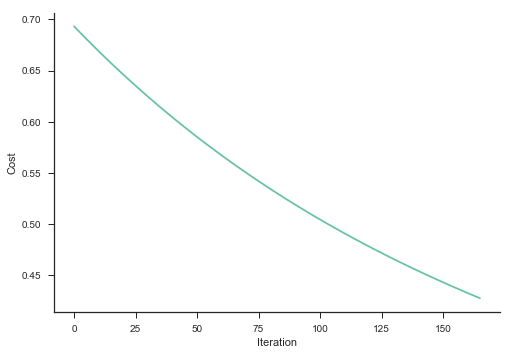

In [17]:
plt.plot(cost_iter[:,0], cost_iter[:,1])
plt.ylabel("Cost")
plt.xlabel("Iteration")
sns.despine()

You can see that as we ran our algorithm, we continued to decrease our cost function and we stopped right at about when we see the decrease in cost to level out. Nice - everything seems to be working!

Lastly, another nice check is to see how well a packaged version of the algorithm does:

In [18]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(X_new, y_flip)
sum(y_flip == logreg.predict(X_new))

100

Cool - they also get 100 / 100 correct. Looking good :)